# Solving an algebraic equation by evaluating a root using the Bisection Method

## Setting the Scene

The most basic way for us to find the root of a function ($r \in \mathbb{R}: f(r) = 0$) is to find where its evaluation crosses the x axis. 

Say we have the following function, $f(x) = x^3 + x - 1$, represented in the following Python code as a function which is then evaluated at $x = 0.1$.

```python
f = lambda x: x**3 + x - 1
f(0.1)
```

Next, we evaluate the function over $[0,1)$ at $10^2$ individual points, using NumPy's ```linspace``` function. We've named the array of points ```xdim```, for the x-dimension.

```python
xdim = np.linspace(0, 1, 10**2)
```

A plot of the function at these points is generated in the following code, to produce a graph.

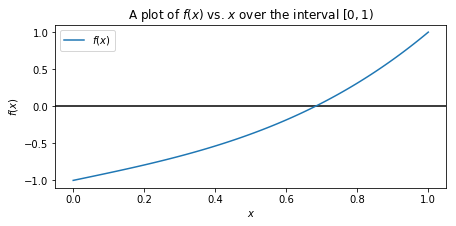

In [9]:
import numpy as np
import matplotlib.pyplot as plt

################
# Definitions

f = lambda x: x**3 + x - 1
xdim = np.linspace(0, 1, 10**2)

################
# Plotting

plt.figure(figsize=(7,3))
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("A plot of $f(x)$ vs. $x$ over the interval $[0,1)$")

plt.axhline(color='black')
plt.plot(xdim, f(xdim), label="$f(x)$")

plt.legend()
plt.show()

We can see that there must be a root $r$ somewhere in $[0,1)$ for $f(x) = x^3 +x -1$

## Bisection (What?)

Once we have an interval where we know a root exists, we can proceed.

The general idea is that if we iteratively evaluate the function at the midpoint ($f(c)$) of our bracketed interval, then multiply it with the function evaluated at either endpoint ($f(a),\ f(b)$); the result will be less than zero, indicating that a sign change occurred e.g. $f(a) \cdot f(c) < 0$. 

If a sign change occurred ($f(a) \cdot f(c) < 0$), then somewhere in the interval $[a,c]$, a root exists.

The following Python code implements the iterative Bisection Method as a callable function, which itself returns the endpoints of an interval where the root may be found.

In [1]:
def bisection(func, interval=[0,1], tolerance=1e-05, max_iter=32):
    a = interval[0]
    b = interval[1]
    
    iter_count = 1
    while (b - a)/2 > tolerance and iter_count <= max_iter:
        c = (a+b)/2
        if func(c) == 0:
            return [c,c]
        if func(a) * func(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
        
    return [a,b]

Let's break it apart line by line.

```python
def bisection(func, interval=[0,1], tolerance=1E-5, max_iter=64):
```

This is our function declaration. It accepts as arguments
* ```func```, the (callable!) function we want to evaluate
* ```interval=[0,1]```, the bracketed interval we know a root exists in. The default provided is $[0,1)$. 
* ```tolerance=1e-05```, The tolerance of our absolute error (the amount we're willing to deviate from the real answer), in this case the default will give us an answer of $r \pm 10^{-5}$ or $r \pm 0.00001$.
* ```maxiter=32```, the maximum number of times we perform the iteration, the default is 32.

Then, we reassign the endpoints given in the ```interval``` argument to the variables $a,b$. 

```python
a = interval[0]
b = interval[1]
```

Next, we construct the loop we want to use,

```python
iter_count = 1
while (b - a)/2 > tolerance and iter_count <= max_iter:
```

where we set a counter of how many times we've iterated, and a ```while``` loop with the conditions for which we'll continue iterating.

If the midpoint of the difference of the endpoints of the interval is within tolerance, then we know we're $\pm\ \mathrm{tolerance}$ away from the answer, $r \in [a,b]$. If we've iterated the maximum number of times, we'll stop iterating. 



Inside of the loop,

We calculate the midpoint $c \in [a,b]$.

```python
    c = (a+b)/2
```

If the function evaluated at the midpoint equals 0, we know we've found the root, and return it.

```python
    if func(c) == 0:
        return [c,c]
```

Otherwise, we see if a sign change has occurred in the interval $[a,c]$ (between the leftmost side . If it has, update the "right-hand-side" (terminating endpoint) of the bracket to be the midpoint, and continue iteration.

```python
    if func(c) * func(a) < 0:
        b = c
```

Next, if the above aren't true, relying on the idea that a root does in fact exist in the interval, we'll change the "left-hand-side" (initial endpoint) of the interval to the midpoint (to look in the other half of the interval for the root).

```python
    else:
        a = c
```        

Finally, we update the iteration count by adding 1

```python
    iter_count += 1
```

Once we break out of the loop, we'll return the two endpoints of the interval where the root exists in.

```python
return [a,b]
```

Within tolerance, the root is the midpoint of these two endpoints of the interval as found by the iteration.

## Why? How? 

Hopefully, this illuminates why this is called the "Bisection" Method. Taking an interval where we know a root exists, we look at  two "halved" (or bisected) sub-intervals to see where the sign change did occur (crossed the x-axis, where a root exists). 

Then for each iteration, we effectively discard the other half of the interval by using the midpoint as the new endpoint for the interval for the next iteration.

Let's look at how it works by running it on our example function from above, and format the values at each iteration into a table using a library called ```pandas```.

Remember, we're solving for $x$ in $0 = f(x) = x^3 + x - 1$



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

################
# Definitions

f = lambda x: x**3 + x - 1

def bisection_tabled(func, interval=[0,1], err_tol=1e-05, max_iter=32):
    """
        Run the bisection method inside a 'test harness' to keep track of values
    """
    # lists for tables
    iter_counts = [1,]
    a_vals = [interval[0],]
    b_vals = [interval[1],]
    
    iter_count = iter_counts[-1]
    
    #    Use a loop and re-run the bisection method once per iteration, 
    # so we can keep track of the values.
    while (b_vals[-1] - a_vals[-1])/2 > err_tol and iter_count <= max_iter:
        a,b = bisection(func, 
                        interval=[a_vals[-1],b_vals[-1]], 
                        tolerance=err_tol, 
                        max_iter=1)
        
        iter_count += 1
        
        # track the values returned
        a_vals.append(a)
        b_vals.append(b)
        iter_counts.append(iter_count)
    
    # build the datatable
    d = {'Iteration': iter_counts, 
         'Left Bracket': a_vals,
         'Right Bracket': b_vals, 
        }
    df = pd.DataFrame(data=d)
    
    return df

    
# run the program on f(x)
bisection_tabled(f)



,Iteration,Left Bracket,Right Bracket
0,1,0.000000,1.000000
1,2,0.500000,1.000000
2,3,0.500000,0.750000
3,4,0.625000,0.750000
4,5,0.625000,0.687500
5,6,0.656250,0.687500
6,7,0.671875,0.687500
7,8,0.679688,0.687500
8,9,0.679688,0.683594
9,10,0.681641,0.683594


We can see that after 17 iterations, the iteration has converged, and identified the root as the midpoint 

$$ \frac{0.682327 + 0.682343}{2} = 0.682335 \pm 0.000008 $$

which is within our specified error tolerance.

### How accurate?

Let's conduct an "error analysis" by looking at what the algorithm does after the maximum number of iterations (the worst case scenario). 

What will our absolute error $| x_c - r |$ be after $n$ iterations? (Where $x_c = (a_n + b_n) /2$, the midpoint after $n$ iterations).

Since we're dividing the interval length $(b-a)$ in half in half at each step of the iteration, and we're returning an interval where the root exists and use the midpoint as an approximation, 

$$ |x_c - r| \leq \frac{b - a}{2^{n+1}} $$


### How fast?

For $n$ steps until convergence is reached, we need to run 4 function evaluations and some number of arithmetic operations. 

The 'worst-case' runtime per number of iterations, usually termed the "time complexity" of the algorithm, is then $ \mathcal{O}(n) $, which we call a "linear" runtime complexity (the relationship between how long the algorithm will take to run and the worst-case number of steps is linear).


## When? Where?

When or where would we want to use the bisection method? 

One of the advantages is that we don't need much information beyond the function (or an analytic function) itself and the precision (absolute error) that we need for whichever situation is at hand. 

To determine if it's feasible to use the bisection method, we can use what we determined via the error analysis to find how many iterations we need for convergence. Using knowledge about the hardware we have at our disposal, we can then find how long it might take to solve the equation.

Furthermore, other high-powered algorithms we will use later do not necessarily have the same guarantees of stability, or require additional external information to work. For the bisection method, we can very easily define finite criteria which terminates the iteration.

However, we'll see later on that for the category of algorithms which solve algebraic equations, including the Bisection Method, the finite precision (stability, approximation) of computer arithmetic will affect how many precise digits we will be able to compute.

## Lab Exercises

1. Can you identify criteria for a function that would work well for the bisection method? 

&emsp;

2. Can you identify criteria for a function that would **not** work well for the bisection method?

&emsp;

3. In your own words, when would you use this algorithm given how fast (or slow) it is?

&emsp;

4. Let $x(t) = 5t^2 + t - 1 + \cos(3t) $ represent the position of a particle $x$ at a point in time $t$. 
    * Use prior knowledge of the calculus on a continuous function to identify an interval where a root exists.
    * Create a plot of the position of the particle over that time interval.
    * Use the provided bisection method, or write your own, to determine what the root of $x(t)$ is in that interval. 
    
    > NumPy provides a way to approximate $\cos(x)$ via the `cos` [method provided by the library](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html "SciPy docs, NumPy Reference, cos"). To call it using how NumPy is used in the above examples, invoke it with 
    ```python
    xdim = np.linspace(-1, 1, 10**2)
    fx = np.cos(xdim)
    ```
    which will calculate the cosine of $10^2$ points over the interval [-1, 1) and store that NumPy array in `fx`. 